In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("Churn_Modeling.csv")

In [20]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
df=df.drop(['RowNumber','Surname','CustomerId'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
states = pd.get_dummies(df['Geography'])
gender = pd.get_dummies(df['Gender'])
df = pd.concat([df,gender,states], axis = 1)

In [24]:
df=df.drop(['Geography','Gender'],axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [25]:
y=df['Exited']
x=df.drop(['Exited'],axis=1)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.42623221, -0.74884677,  1.37128388, ..., -0.99970154,
         1.72177148, -0.57413317],
       [ 0.35134354, -0.07909881, -0.01735802, ...,  1.00029855,
        -0.58079717, -0.57413317],
       [ 0.16472536, -0.17477709, -1.05883945, ..., -0.99970154,
         1.72177148, -0.57413317],
       ...,
       [-0.65432109,  0.01657948,  0.32980245, ..., -0.99970154,
         1.72177148, -0.57413317],
       [ 0.17509304, -0.55749021, -0.3645185 , ..., -0.99970154,
         1.72177148, -0.57413317],
       [-0.18777565,  1.06904056, -1.05883945, ...,  1.00029855,
        -0.58079717, -0.57413317]])

In [28]:
import keras#Can use Tenserflow as well but won't be able to understand the errors i
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers
classifier = Sequential()

In [41]:
# classifier.add(Dense(activation = "relu",units = 6,kernel_initializer="uniform"))
# classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))
# classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform"))
# classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy'])
# classifier.summary() #3 layers created. 6 neurons in 1st,6neurons in 2nd layer and 1
# classifier.fit(X_train,y_train,batch_size=2,epochs=50) #Fitting the ANN to training
# y_pred =classifier.predict(X_test)

# build the NN model using Sequential calss
model = Sequential()

# Adding the layres with 13 inputs and fully connected neurons.
# using 'ELU' and 'ReLU' activation functions in the hidden layers
# using one sigmoid function at the output as it's a classification model
model.add(Dense(128, input_shape = (13,), activation = 'elu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'swish'))
model.add(Dense(16, activation = 'elu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'swish'))
model.add(Dense(16, activation = 'elu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'swish'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy'])
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 128)               1792      
                                                                 
 dense_44 (Dense)            (None, 64)                8256      
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dense_47 (Dense)            (None, 64)                1088      
                                                                 
 dense_48 (Dense)            (None, 32)                2080      
                                                                 
 dense_49 (Dense)            (None, 16)               

In [43]:
model_hist=model.fit(X_train, y_train,batch_size = 1000,validation_split = 0.2, epochs=50, verbose = 1)
model_hist

Epoch 1/50
6/6 [==============================] - 1s 36ms/step - loss: 0.6770 - accuracy: 0.7231 - val_loss: 0.6494 - val_accuracy: 0.7993
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 0.6269 - accuracy: 0.7976 - val_loss: 0.5883 - val_accuracy: 0.7993
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 0.5583 - accuracy: 0.7976 - val_loss: 0.5125 - val_accuracy: 0.7993
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 0.4854 - accuracy: 0.7976 - val_loss: 0.4609 - val_accuracy: 0.7993
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 0.4480 - accuracy: 0.7976 - val_loss: 0.4498 - val_accuracy: 0.7993
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 0.4322 - accuracy: 0.7976 - val_loss: 0.4335 - val_accuracy: 0.7993
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 0.4214 - accuracy: 0.7976 - val_loss: 0.4257 - val_accuracy: 0.7993
Epoch 8/50
6/6 [================

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2617
           1       0.68      0.50      0.58       683

    accuracy                           0.85      3300
   macro avg       0.78      0.72      0.74      3300
weighted avg       0.84      0.85      0.84      3300



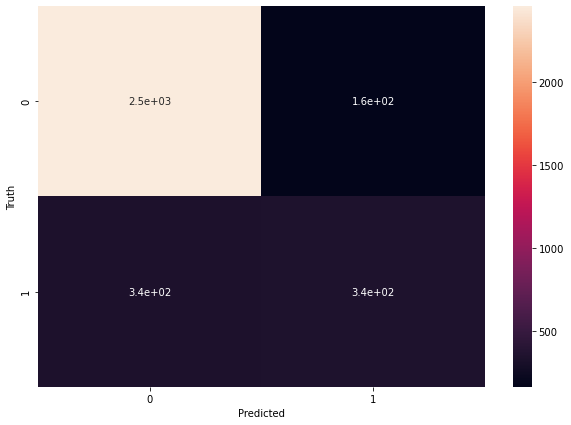

In [54]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred)
cm
accuracy = accuracy_score(y_test,y_pred)
accuracy
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(classification_report(y_test,y_pred))
